
## Analiza sygnałów przy użyciu transformacji Fouriera (FFT) z biblioteki numpy

Transformacja Fouriera to narzędzie matematyczne, które pozwala na analizę różnych rodzajów sygnałów (czasowych, przestrzennych itp.) w celu identyfikacji składowych częstotliwościowych, które w nich występują. FFT, czyli szybka transformacja Fouriera, jest algorytmem służącym do efektywnego obliczania dyskretnej transformacji Fouriera (DFT).

### Wprowadzenie teoretyczne
DFT przekształca sygnał z dziedziny czasu (lub przestrzeni) na sygnał w dziedzinie częstotliwości. Jest to szczególnie przydatne w analizie sygnałów cyfrowych, gdzie możemy określić dominujące częstotliwości składowe sygnału, co ma zastosowanie w przetwarzaniu sygnałów, analizie harmoniczną, kompresji danych, itp.


## Wprowadzenie do generowania sygnałów harmonicznych

Sygnały harmoniczne, takie jak fale sinusoidalne, są podstawowym narzędziem w analizie i przetwarzaniu sygnałów. Fala sinusoidalna jest definiowana przez swoją amplitudę, częstotliwość i fazę. W kontekście cyfrowym, kluczowe jest zrozumienie, jak te fale są generowane, próbkowane i reprezentowane w systemach cyfrowych.

### Generowanie sinusa
Sinusoidalny sygnał cyfrowy jest definiowany przez jego amplitudę, częstotliwość i fazę, i jest generowany przez próbkowanie ciągłej funkcji sinus w równomiernie rozłożonych punktach czasowych. Matematycznie można go przedstawić jako:
$$ s(t) = A \sin(2\pi ft + \phi) $$
gdzie:
- \( A \) jest amplitudą,
- \( f \) jest częstotliwością sygnału (w hercach),
- \( \phi \) jest fazą początkową (w radianach),
- \( t \) jest czasem.
### Czas trwania i próbkowanie
Czas trwania sygnału określa, jak długo sygnał jest obserwowany lub generowany. W przypadku cyfrowego sygnału, jest to zazwyczaj określane przez liczbę próbek i częstotliwość próbkowania. Próbkowanie to proces konwersji sygnału ciągłego na sygnał dyskretny poprzez określenie wartości sygnału w równomiernie rozłożonych punktach w czasie.

### Częstotliwość próbkowania i Nyquista
Częstotliwość próbkowania \( f_s \) jest równa połowie częstotliwości próbkowania i jest maksymalną częstotliwością, którą można skutecznie próbkować bez ryzyka aliasingu. Aliasing występuje, gdy wyższe częstotliwości sygnału są niewłaściwie reprezentowane jako niższe częstotliwości, co prowadzi do zniekształceń i błędów w rekonstrukcji sygnału. 

Częstotliwość próbkowania to liczba próbek sygnału zbieranych w ciągu jednej sekundy. Zgodnie z twierdzeniem Nyquista-Shannona, częstotliwość próbkowania powinna być co najmniej dwa razy większa od najwyższej częstotliwości zawartej w sygnale, aby uniknąć zjawiska aliasingu. Częstotliwość ta nazywana jest częstotliwością Nyquista.

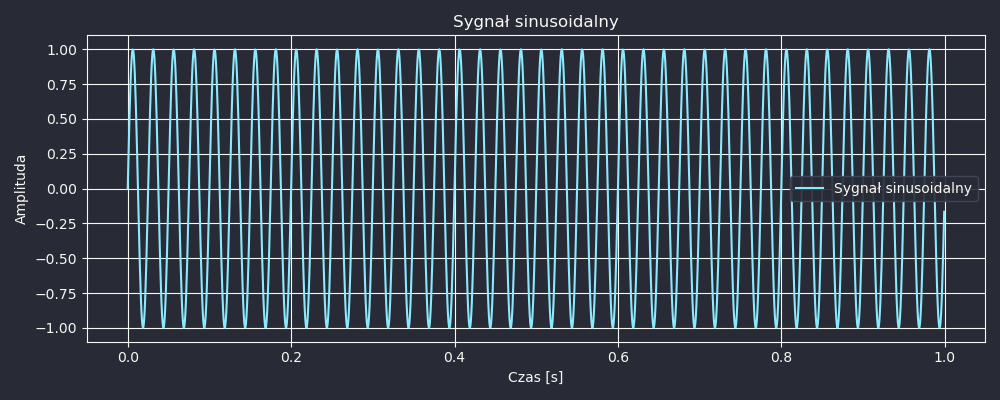

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
fs = 1500  # częstotliwość próbkowania [Hz]
T = 1      # czas trwania sygnału [s]
f = 40      # częstotliwość sygnału [Hz]

# Generowanie osi czasu
t = np.linspace(0, T, int(fs * T), endpoint=False)

# Generowanie sygnału sinusoidalnego
signal = np.sin(2 * np.pi * f * t)

# Wyświetlenie sygnału
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Sygnał sinusoidalny')
plt.title('Sygnał sinusoidalny')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()
plt.show()


### Analiza częstotliwościowa sygnału
Do przeprowadzenia analizy częstotliwościowej użyjemy FFT z biblioteki numpy. FFT przekształca sygnał z dziedziny czasu do dziedziny częstotliwości, co pozwala na identyfikację składowych częstotliwości sygnału.

Dokumentacja: https://numpy.org/doc/stable/reference/routines.fft.html

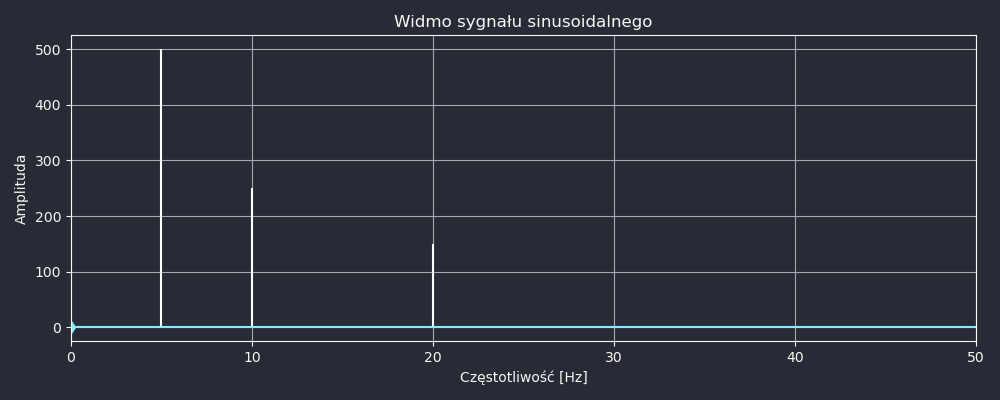

In [6]:
# Obliczenie FFT
fft_values = np.fft.rfft(signal)
frequencies = np.fft.rfftfreq(len(signal), 1/fs)

# Wyświetlenie wyników FFT
plt.figure(figsize=(10, 4))
plt.stem(frequencies, np.abs(fft_values), 'w', markerfmt=" ", basefmt="-d")
plt.title('Widmo sygnału sinusoidalnego')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, 50)  # Ograniczenie zakresu częstotliwości do analizy
plt.grid(True,color="darkgray")
plt.show()


# Filtracja sygnałów za pomocą FFT
Jedną z praktycznych aplikacji FFT jest filtracja sygnałów, co pozwala usunąć niepożądane częstotliwości lub zakłócenia z sygnału. Możemy to zrobić, manipulując wynikami FFT przed wykonaniem odwrotnej transformacji Fouriera (IFFT).

Kluczową kwestią w analizie sygnałów jest ich filtracja, czyli proces selektywnego przepuszczania składowych sygnału o określonych częstotliwościach i tłumienia pozostałych. W analizie Fouriera często stosuje się filtry dolnoprzepustowe, które pozwalają na przepuszczenie składowych sygnału o częstotliwościach niższych niż określona wartość graniczna (cutoff frequency), a tłumią składowe o częstotliwościach wyższych.

## Przykład filtracji dolnoprzepustowej

Poniżej dodaję kod, który generuje sygnał złożony z kilku składowych częstotliwości, a następnie stosuje prosty filtr dolnoprzepustowy, który zachowuje częstotliwości poniżej określonego progu, eliminując wyższe częstotliwości.


W podanym kodzie:

Przeprowadzono FFT na sygnale złożonym z trzech sinusoid o różnych częstotliwościach.
- Ustalono częstotliwość graniczną (cutoff_frequency) na 10 Hz, co oznacza, że chcemy zatrzymać składowe sygnału poniżej tej wartości.
- Wartości w widmie FFT odpowiadające częstotliwościom wyższym niż graniczna są zerowane. Jest to operacja filtracji w dziedzinie częstotliwości.
- Następnie wykonywana jest odwrotna transformacja Fouriera (IFFT) na zmodyfikowanym widmie, co daje sygnał przefiltrowany.

Filtr dolnoprzepustowy: Filtr dolnoprzepustowy jest realizowany poprzez wyzerowanie składowych widma, które odpowiadają częstotliwościom wyższym niż zadana częstotliwość odcięcia. W praktyce, stworzona jest "maska" - tablica, w której elementy odpowiadające wyższym częstotliwościom są ustawione na zero, a te odpowiadające niższym - pozostawione bez zmian.

In [7]:
# Filtr dolnoprzepustowy
cutoff_frequency = 10  # Hz
fft_values[np.abs(frequencies) > cutoff_frequency] = 0

W powyższym kodzie cutoff_frequency określa maksymalną częstotliwość, która może przejść przez filtr. 

Warunek np.abs(frequencies) > cutoff_frequency jest używany do zidentyfikowania indeksów w tablicy frequencies, które odpowiadają częstotliwościom wyższym niż częstotliwość odcięcia.

Przyjęto konwencję, że składowe widma o wyższych częstotliwościach niż cutoff_frequency są tłumione (ustawiane na 0).

Wykonanie odwrotnej FFT: Po modyfikacji widma sygnału (filtracji), wykonujemy odwrotną transformację Fouriera, aby przekształcić sygnał z powrotem do dziedziny czasu. Wynikowa funkcja powinna zawierać głównie składowe sygnału o niższych częstotliwościach.

Wyświetlenie wyników: Na końcu przedstawiamy sygnał oryginalny i przefiltrowany na wykresach, co pozwala na porównanie i ocenę efektu filtracji.

Przy projektowaniu filtru dolnoprzepustowego w dziedzinie częstotliwości, ważne jest również uwzględnienie faktu, że widmo sygnału jest symetryczne. Dla rzeczywistych sygnałów częstotliwości dodatnie i ujemne są zespolonymi sprzężeniami, więc filtracja musi być symetryczna względem zera.


Filtracja sygnału przy pomocy FFT polega na modyfikacji widma sygnału w dziedzinie częstotliwości, aby usunąć niechciane składowe. W kodzie, który przedstawiłeś, użyto prostej metody stworzenia filtra dolnoprzepustowego, który eliminuje częstotliwości powyżej zadanej granicy. Poniżej przedstawiam szczegółowy opis procesu filtracji z wykorzystaniem maski.

/home/kkingstoun/software/anaconda3/envs/numba_sprawna/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


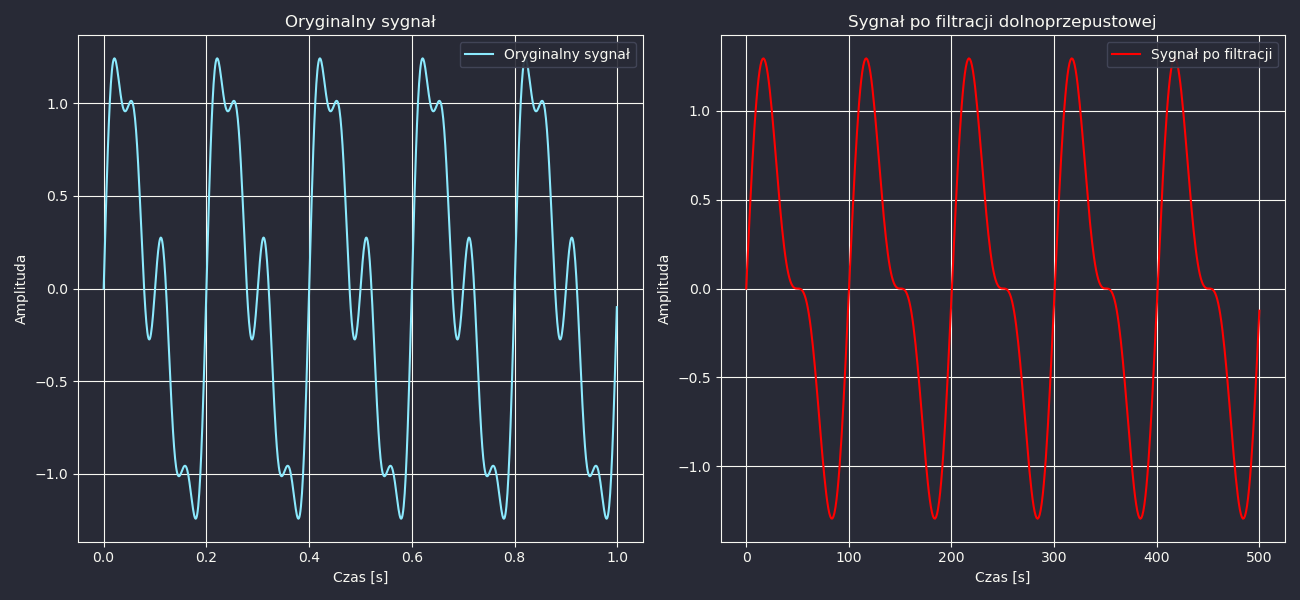

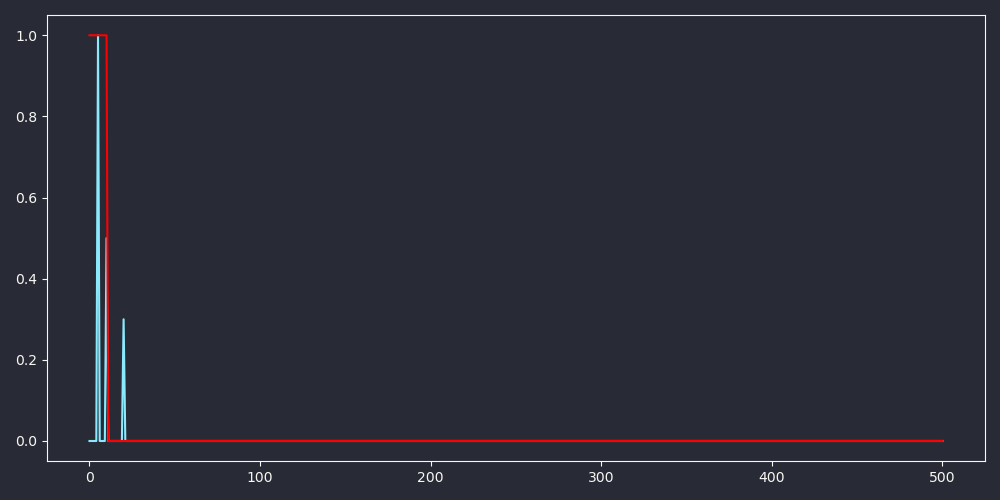

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Ustawienia początkowe
fs = 1000  # Częstotliwość próbkowania w Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Oś czasu

# Generowanie sygnału złożonego
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + 0.3 * np.sin(2 * np.pi * 20 * t)

# Przeprowadzenie FFT na sygnale
fft_values = np.fft.rfft(signal)
frequencies = np.fft.rfftfreq(len(signal), 1/fs)

# Zastosowanie filtra dolnoprzepustowego
# Częstotliwość graniczna filtra jest ustalona na 10 Hz
cutoff_frequency = 10  # Hz
# Tworzenie maski dla wartości FFT, które mają być zachowane
low_pass_mask = np.abs(frequencies) <= cutoff_frequency
# Stosowanie maski do wartości FFT, zerowanie pozostałych
fft_values_filtered = fft_values * low_pass_mask

# Wykonanie odwrotnej transformacji FFT, aby uzyskać sygnał czasowy
filtered_signal = np.fft.ifft(fft_values_filtered)


# Prezentacja wyników
plt.figure(figsize=(13, 6))
# Wyświetlenie oryginalnego sygnału
plt.subplot(121)
plt.plot(t, signal, label='Oryginalny sygnał')
plt.title('Oryginalny sygnał')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()

# Wyświetlenie sygnału po filtracji
plt.subplot(122)
plt.plot( filtered_signal, label='Sygnał po filtracji', color='r')
plt.title('Sygnał po filtracji dolnoprzepustowej')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.legend()

plt.show()

plt.figure()
plt.plot(frequencies, np.abs(fft_values)/np.abs(fft_values).max(), label='Widmo sygnału')
plt.plot(frequencies, np.abs(low_pass_mask), label='Widmo sygnału po filtracji', color='r')


# Zastosowanie okienkowania

Okienkowanie to technika, która zmniejsza skutki dyskretyzacji na brzegach sygnału, co może prowadzić do powstawania niepożądanych efektów, takich jak przecieki spektralne. Poniżej przedstawiam kod z zastosowaniem okna Hamminga przed wykonaniem FFT.

Stosowanie okna Hamminga (lub innych funkcji okna) pomaga zminimalizować te wycieki poprzez "wygładzenie" sygnału na jego krańcach. Oznacza to, że sygnał jest mnożony przez funkcję okna, która ma wartości bliskie zero na swoich końcach i jedynkę w centrum. Proces ten pozwala na łagodne przenikanie sygnału od wartości maksymalnych do zera na krańcach przedziału, zamiast gwałtownego skoku, co redukuje wycieki widmowe przy przetwarzaniu sygnału przez FFT.

https://numpy.org/doc/stable/reference/routines.window.html

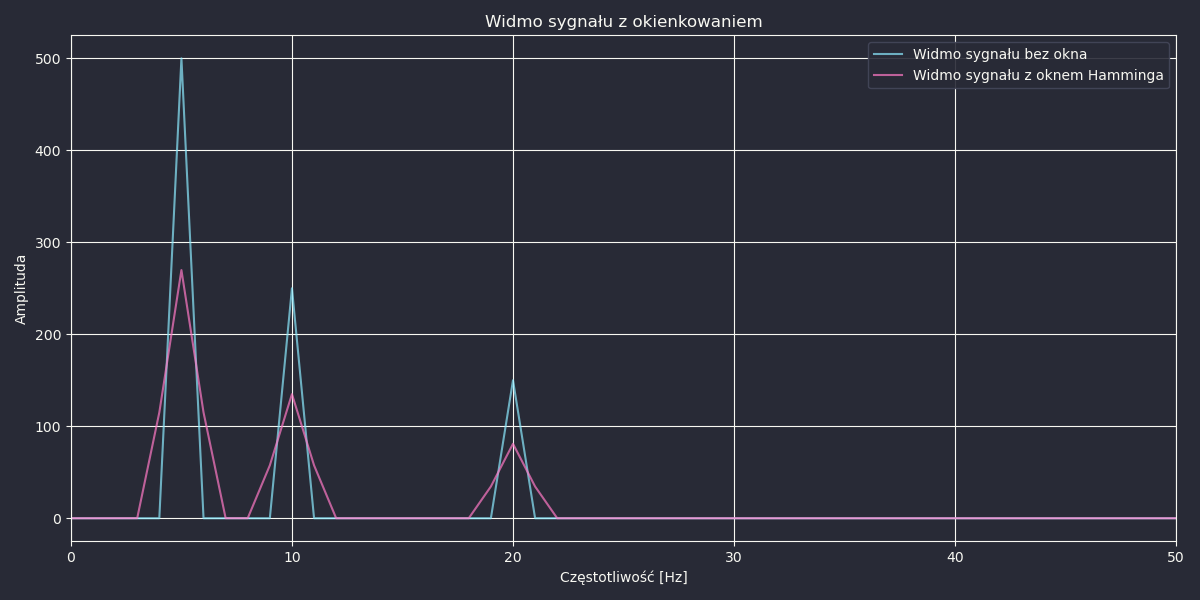

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry sygnału
fs = 1000  # Częstotliwość próbkowania [Hz]
T = 1      # Czas trwania sygnału [s]
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Wektor czasu

# Generowanie sygnału złożonego
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t) + 0.3 * np.sin(2 * np.pi * 20 * t)

# Okno Hamminga
window = np.hamming(len(signal))
# Sygnał po przemnożeniu przez okno Hamminga
windowed_signal = signal * window

# FFT sygnału z okienkowaniem i bez
fft_signal = np.fft.rfft(signal)
fft_windowed = np.fft.rfft(windowed_signal)
frequencies = np.fft.rfftfreq(len(signal), 1/fs)

# Wyświetlenie widm sygnału
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft_signal), label='Widmo sygnału bez okna', alpha=0.7)
plt.plot(frequencies, np.abs(fft_windowed), label='Widmo sygnału z oknem Hamminga', alpha=0.7)
plt.title('Porównanie widma sygnału z okienkowaniem i bez')
plt.title('Widmo sygnału z okienkowaniem')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.xlim(0, 50)
plt.legend()
plt.grid(True)
plt.show()


In [17]:
!pip install scikit-image

## Analiza i odszumianie obrazów przy użyciu 2D FFT

Transformacja Fouriera dla obrazów pozwala przekształcić dane z dziedziny przestrzennej (gdzie każdy punkt ma współrzędne x, y i jasność) do dziedziny częstotliwości. W dziedzinie częstotliwości łatwiej jest analizować oraz manipulować obrazami, na przykład do usuwania szumów czy filtracji.

### Wprowadzenie teoretyczne
Dwuwymiarowa transformacja Fouriera (2D FFT) jest rozszerzeniem jednowymiarowej transformacji na obrazy. Analizując obraz w dziedzinie częstotliwości, możemy łatwiej identyfikować i filtrować komponenty, które odpowiadają za wysokie częstotliwości (szumy, ostre krawędzie itp.).

### Przygotowanie obrazu do analizy
Załadujemy obraz, na którym zastosujemy 2D FFT, aby zobaczyć, jak transformacja pozwala na analizę częstotliwościową obrazu.


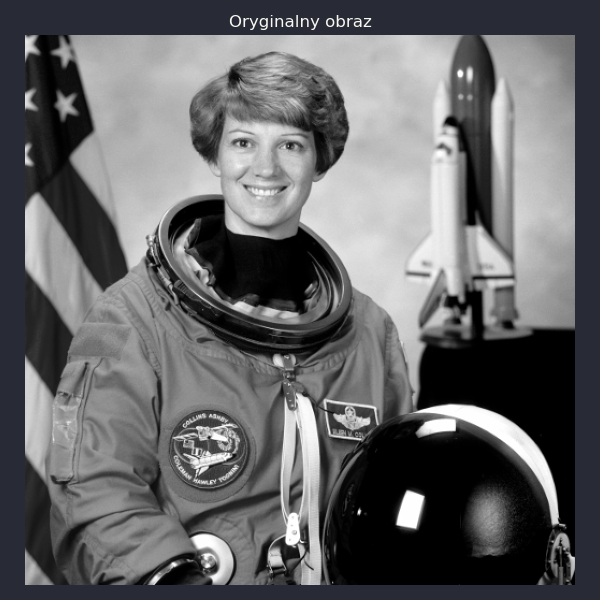

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.color import rgb2gray

# Ładowanie obrazu
image = rgb2gray(img_as_float(data.astronaut()))

# Wyświetlanie obrazu
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')
plt.show()

### Wykonanie 2D FFT
Teraz przeprowadzimy transformację Fouriera na wcześniej załadowanym obrazie, aby przekształcić go do dziedziny częstotliwości i analizować składowe częstotliwościowe.


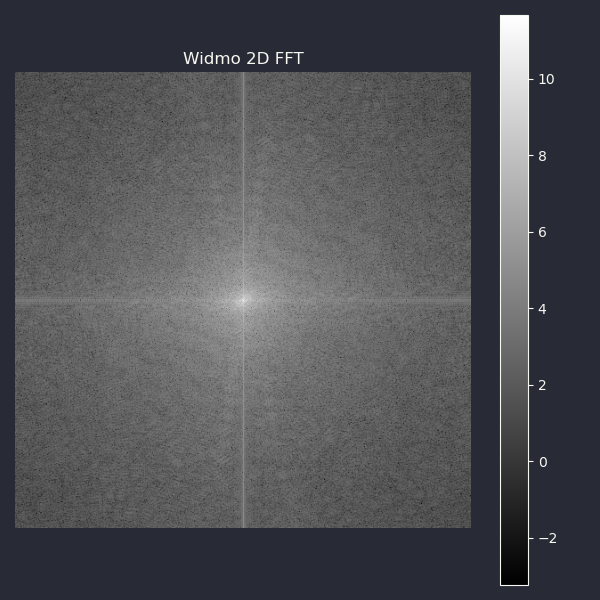

In [11]:
fft_image = np.fft.fftshift(np.fft.fft2(image))

# Wyświetlenie widma
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(fft_image)), cmap='gray')
plt.title('Widmo 2D FFT')
plt.colorbar()
plt.axis('off')
plt.show()

### Odszumianie obrazu
Wykorzystując zdobytą wiedzę o częstotliwościach obrazu, możemy teraz zaimplementować prosty filtr, który usunie wysokie częstotliwości, co często odpowiada za szumy w obrazach.


/tmp/ipykernel_229904/2207847348.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros((rows, cols), dtype=np.bool)


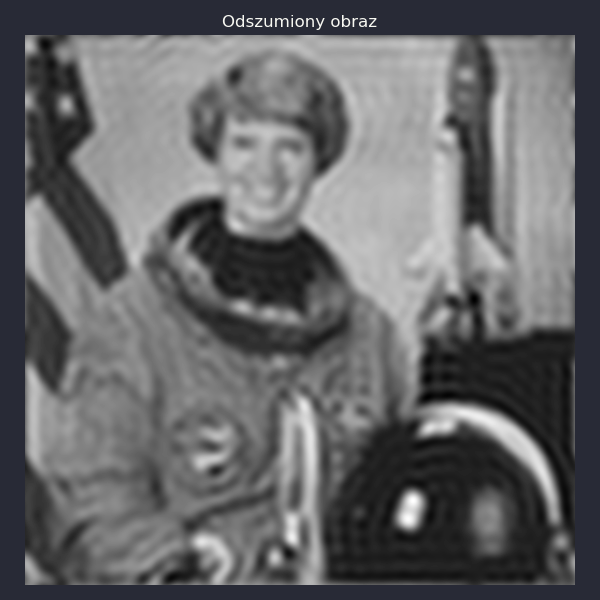

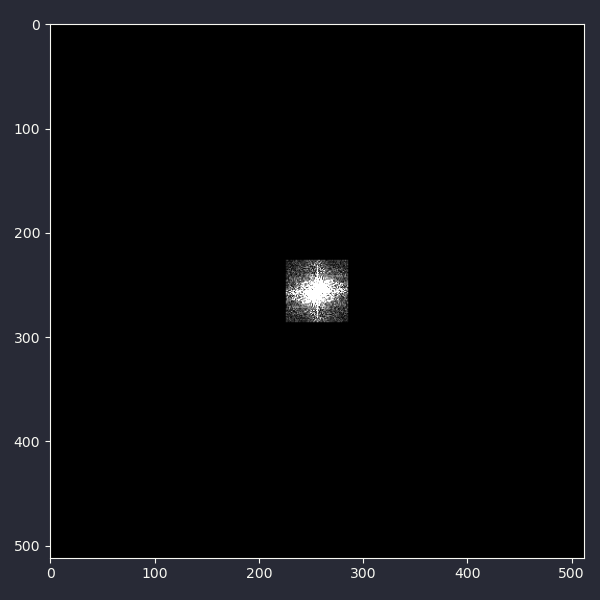

In [12]:
# Maskowanie wysokich częstotliwości
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
radius = 30  # promień maski
mask = np.zeros((rows, cols), dtype=np.bool)
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = True
fft_image_masked = fft_image * mask

plt.figure(figsize=(6, 6))
plt.imshow(np.abs(fft_image_masked), cmap='gray',vmax=9.6e2)

# Odwrotna FFT
image_filtered = np.fft.ifft2(np.fft.ifftshift(fft_image_masked)).real

# Wyświetlenie odszumionego obrazu
plt.figure(figsize=(6, 6))
plt.imshow(image_filtered, cmap='gray')
plt.title('Odszumiony obraz')
plt.axis('off')
plt.show()

## Usuwanie szumu sinusoidalnego z obrazu przy użyciu 2D FFT

W tym notatniku zastosujemy dwuwymiarową transformację Fouriera do analizy i odszumiania obrazu. Szczególnie skupimy się na szumie sinusoidalnym, który jest częstym przypadkiem zakłóceń w obrazach technicznych i naukowych.

### Wprowadzenie teoretyczne
2D FFT umożliwia analizę obrazu w dziedzinie częstotliwości, co jest kluczowe do identyfikacji i usuwania określonych typów szumów. Szum sinusoidalny, będący regularnym wzorem nałożonym na obraz, może być skutecznie zidentyfikowany i usunięty poprzez filtrację w dziedzinie częstotliwości.

### Przygotowanie obrazu do analizy
Zaczniemy od załadowania obrazu, na który nałożymy szum sinusoidalny.

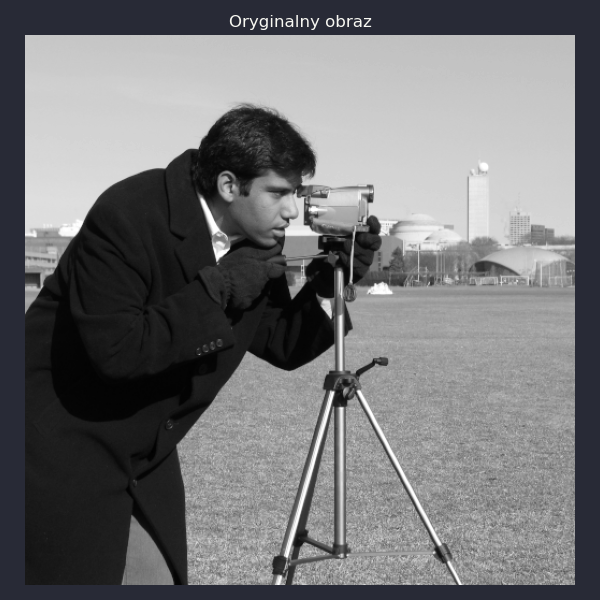

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.color import rgb2gray

# Ładowanie obrazu
image = img_as_float(data.camera())

# Wyświetlanie obrazu
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')
plt.show()

### Nałożenie szumu sinusoidalnego
Na oryginalny obraz nałożymy szum sinusoidalny, który później spróbujemy usunąć przy użyciu 2D FFT.


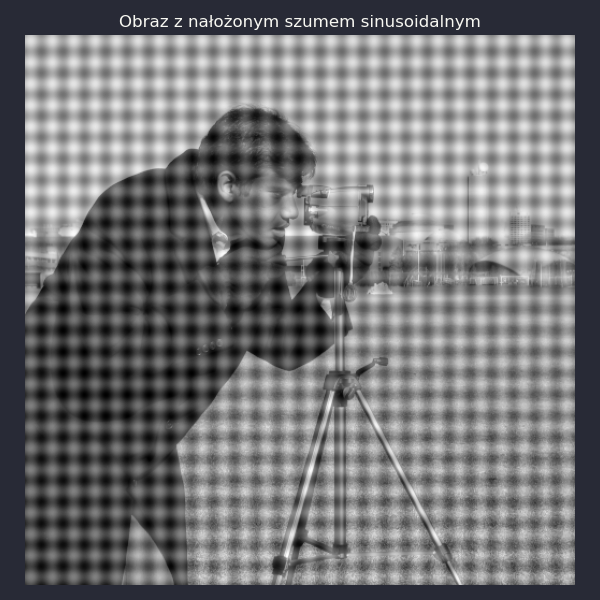

In [14]:
# Generowanie szumu sinusoidalnego
rows, cols = image.shape
x = np.linspace(0, rows, rows)
y = np.linspace(0, cols, cols)
X, Y = np.meshgrid(y, x)

sinusoidal_noise = 0.2 * np.sin(2 * np.pi * 0.05 * X) + 0.2 * np.sin(2 * np.pi * 0.05 * Y)

# Nałożenie szumu na obraz
noisy_image = image + sinusoidal_noise

# Wyświetlenie obrazu z szumem
plt.figure(figsize=(6, 6))
plt.imshow(noisy_image, cmap='gray')
plt.title('Obraz z nałożonym szumem sinusoidalnym')
plt.axis('off')
plt.show()

### Usuwanie szumu za pomocą 2D FFT
Po nałożeniu szumu przeprowadzimy 2D FFT, aby zidentyfikować i usunąć szum sinusoidalny.


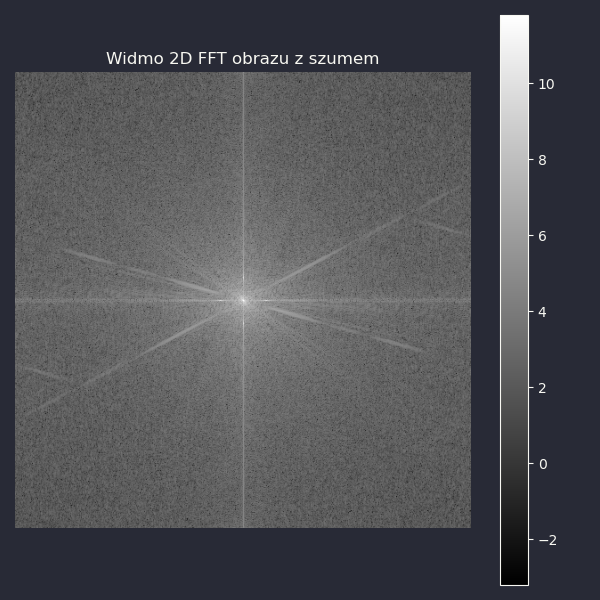

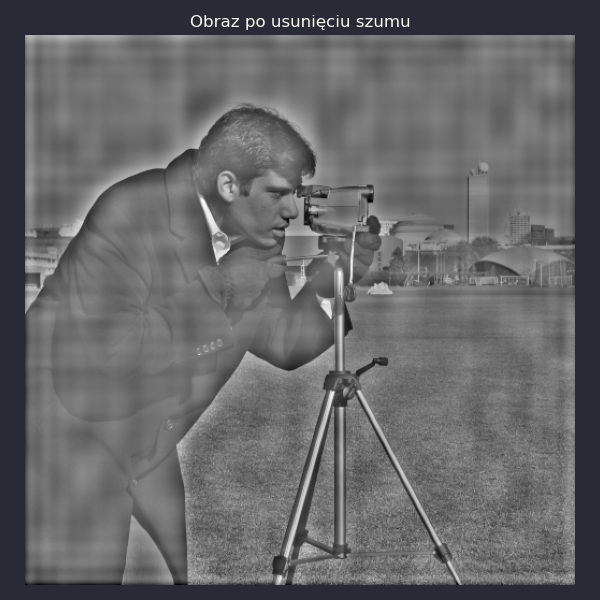

In [15]:
# 2D FFT
fft_image = np.fft.fftshift(np.fft.fft2(noisy_image))

# Wyświetlenie widma
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(fft_image)), cmap='gray')
plt.title('Widmo 2D FFT obrazu z szumem')
plt.colorbar()
plt.axis('off')
plt.show()

# Filtracja w dziedzinie częstotliwości
fft_image[np.abs(fft_image) > 1e3] = 0  # Progowanie wartości

# Odwrotna FFT
clean_image = np.fft.ifft2(np.fft.ifftshift(fft_image)).real

# Wyświetlenie odszumionego obrazu
plt.figure(figsize=(6, 6))
plt.imshow(clean_image, cmap='gray')
plt.title('Obraz po usunięciu szumu')
plt.axis('off')
plt.show()